### Лабораторная работа №2
#### Дорохин Андрей 221-361

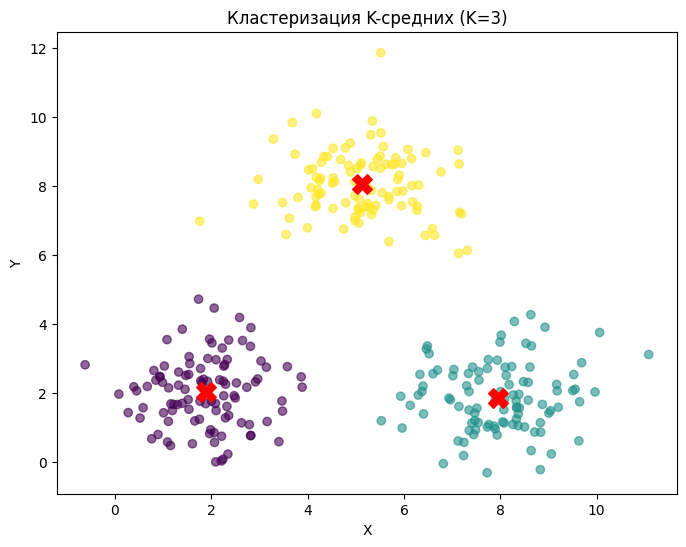

Суммарная квадратичная ошибка (SSE): 561.18
Силуэтный коэффициент: 0.72


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Генерация данных с тремя кластерами
np.random.seed(42)
centers = np.array([[2, 2], [5, 8], [8, 2]])
points_per_cluster = 100

data = np.vstack([
    np.random.normal(loc=centers[0], scale=1.0, size=(points_per_cluster, 2)),
    np.random.normal(loc=centers[1], scale=1.0, size=(points_per_cluster, 2)),
    np.random.normal(loc=centers[2], scale=1.0, size=(points_per_cluster, 2))
])
np.random.shuffle(data)

# Реализация алгоритма K-средних
def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

# Применение алгоритма
k = 3
clusters, centroids = k_means(data, k)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title('Кластеризация K-средних (K=3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Оценка качества
sse = sum(np.sum((data[clusters == i] - centroids[i])**2) for i in range(k))
silhouette = silhouette_score(data, clusters)
print(f'Суммарная квадратичная ошибка (SSE): {sse:.2f}')
print(f'Силуэтный коэффициент: {silhouette:.2f}')